# Використання прогнозування регресії для показників оптимізму

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_spss('Data_prodjWork_copy.sav')
df.columns


Index(['Men_Wom', 'Wik', 'Year', 'Time_happen_fut_1', 'SEO_SELF_ALL',
       'SEO_SELF_ALL_Mean', 'Estimate_positive', 'Estimate_negative',
       'Probabipity_negative', 'Probabipity_positive', 'SEO_Posit_social',
       'SEO_Posit_individual', 'SEO_Posit_prestize', 'SEO_Negative_work',
       'SEO_Negative_individ', 'SEO_Negative_social', 'SEO_ALL_GROUP'],
      dtype='object')

In [21]:
feature_cols = ['Men_Wom', 'Wik','Time_happen_fut_1','Estimate_positive', 'Estimate_negative',
       'Probabipity_negative', 'Probabipity_positive', 'SEO_Posit_social',
       'SEO_Posit_individual', 'SEO_Posit_prestize', 'SEO_Negative_work',
       'SEO_Negative_individ', 'SEO_Negative_social']
X = df[feature_cols] # незалежні змінні
y = df['SEO_ALL_GROUP'] # залежна змінна
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [5]:
len(X_train)

721

In [115]:
df = np.nan_to_num(df)

## Логістична регресія

In [22]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
y_pred=logisticRegr.predict(X_test)
logisticRegr.score(X, y)

C:\Users\lidao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8242718446601942

In [23]:
from sklearn import metrics
from imblearn.metrics import specificity_score
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[ 85,  33],
       [ 20, 171]], dtype=int64)

Text(0.5, 257.44, 'Передбачуваний оптимізм')

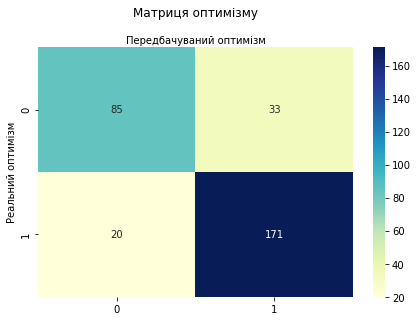

In [25]:
class_names=[1,2] # імена класів
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# створення матриці
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Матриця оптимізму', y=1.1)
plt.ylabel('Реальний оптимізм')
plt.xlabel('Передбачуваний оптимізм')

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Specificity:",specificity_score(y_test, y_pred, average='weighted'))

Accuracy: 0.8284789644012945
Precision: 0.8095238095238095
Recall: 0.7203389830508474
Specificity: 0.7871479767647362


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.81      0.72      0.76       118
         2.0       0.84      0.90      0.87       191

    accuracy                           0.83       309
   macro avg       0.82      0.81      0.81       309
weighted avg       0.83      0.83      0.83       309



## Дерево рішень

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import *
from sklearn.metrics import accuracy_score

In [36]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [31]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8770226537216829


In [32]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9320


In [33]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9320
Test set score: 0.8770


[Text(334.8, 380.52, 'X[6] <= 95.5\ngini = 0.486\nsamples = 721\nvalue = [300, 421]'),
 Text(167.4, 271.8, 'X[9] <= 189.5\ngini = 0.43\nsamples = 416\nvalue = [286, 130]'),
 Text(83.7, 163.07999999999998, 'X[10] <= 185.5\ngini = 0.369\nsamples = 364\nvalue = [275, 89]'),
 Text(41.85, 54.360000000000014, 'gini = 0.332\nsamples = 343\nvalue = [271, 72]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(251.10000000000002, 163.07999999999998, 'X[8] <= 202.5\ngini = 0.334\nsamples = 52\nvalue = [11, 41]'),
 Text(209.25, 54.360000000000014, 'gini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(292.95, 54.360000000000014, 'gini = 0.169\nsamples = 43\nvalue = [4, 39]'),
 Text(502.20000000000005, 271.8, 'X[3] <= 94.5\ngini = 0.088\nsamples = 305\nvalue = [14, 291]'),
 Text(418.5, 163.07999999999998, 'X[12] <= 0.5\ngini = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.278\nsamples = 12\nvalue = [1

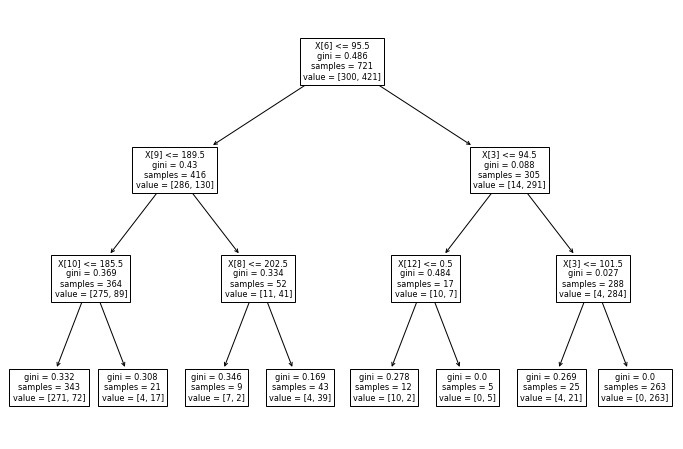

In [37]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train), max_depth=3) 

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.74      0.95      0.83       118
         2.0       0.96      0.80      0.87       191

    accuracy                           0.85       309
   macro avg       0.85      0.87      0.85       309
weighted avg       0.88      0.85      0.86       309



In [62]:
!pip install subprocess.run

  Created wheel for subprocess.run: filename=subprocess.run-0.0.8-py3-none-any.whl size=5399 sha256=a4f6bbd4c8ea19f874e3ed4ad7a74d34dafde62e05310e1d228f845279a92127
  Stored in directory: c:\users\lidao\appdata\local\pip\cache\wheels\aa\e1\f3\7faf41abf731e0c3d4181da2f81ead4280d65517f23f6534e3
Successfully built subprocess.run


## Виведення приналежності до класів

In [98]:
predict = clf.predict(X_test)
for e in range(len(predict)):
    print("{} belongs to class {}".format(X_test,predict[e]))

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

[309 rows x 13 columns] belongs to class 1.0
     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     P

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

[309 rows x 13 columns] belongs to class 2.0
     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     P

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

     Men_Wom   Wik  Time_happen_fut_1  Estimate_positive  Estimate_negative  \
747      2.0  19.0           2.616236              111.0                1.0   
718      2.0  16.0           2.000000              124.0               30.0   
175      2.0  23.0           2.616236              116.0                0.0   
828      1.0  24.0           2.616236               32.0               26.0   
713      2.0  17.0           2.000000              110.0               45.0   
..       ...   ...                ...                ...                ...   
156      2.0  23.0           2.000000               98.0               14.0   
222      2.0  19.0           2.000000              114.0                5.0   
665      1.0  25.0           2.616236              107.0               21.0   
210      2.0  25.0           2.000000              113.0                9.0   
306      2.0  19.0           3.000000              119.0               16.0   

     Probabipity_negative  Probabipity_positive  SE

## Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[110   8]
 [ 12 179]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92       118
         2.0       0.96      0.94      0.95       191

    accuracy                           0.94       309
   macro avg       0.93      0.93      0.93       309
weighted avg       0.94      0.94      0.94       309

Accuracy: 0.9352750809061489


## XGBoost

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [43]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [44]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [45]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[23:39:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [46]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.576441


In [47]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[23:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[23:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [48]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.094768,0.002653,1.094960,0.006624
1,1.004206,0.000679,1.004111,0.009445
2,0.921995,0.000603,0.922501,0.008256
3,0.848962,0.000878,0.850037,0.007145
4,0.785090,0.001356,0.787093,0.005755


In [49]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.308519
Name: test-rmse-mean, dtype: float64


## voting для усіх трьох моделей

In [50]:
from sklearn.ensemble import VotingClassifier
models = [('clf', DecisionTreeClassifier(max_depth=5)), ('logisticRegr',LogisticRegression()),('classifier', RandomForestClassifier(n_estimators = 50))]
ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X_train, y_train)
predictions = ensemble.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

C:\Users\lidao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[109   9]
 [ 17 174]]
              precision    recall  f1-score   support

         1.0       0.87      0.92      0.89       118
         2.0       0.95      0.91      0.93       191

    accuracy                           0.92       309
   macro avg       0.91      0.92      0.91       309
weighted avg       0.92      0.92      0.92       309

